# 【計算智慧於工程上的應用 PSO 作業──第六題】
## constraint:  2≤x≤4; -1≤y≤2; x+y≥3 
## Maximum=1 at (x,y)=(3.575,1)
## 目標式：np.sin(5 * np.pi * ( x1 ** (0.75) - 0.1) ) ** 2  - ( x2 - 1) ** 2

In [28]:
import numpy as np
import random
import math
import copy

class Ind:
    def __init__(self):
        self.x = []
        self.v = []
        self.fitness = 0.0
        self.Bestx = []
        self.Bestfitness = 0.0

    def Fitness(self):
        self.fitness = np.sin(5 * np.pi * ( self.x[0] ** (0.75) - 0.1) ) ** 2 - ( self.x[1] - 1) ** 2
        self.x[1] + self.x[0] >= 3
    def Init(self, Upper, Lower, Vmax, Vmin, N):
        for i in range(N):
            self.x.append(random.uniform(Lower[i], Upper[i]))
            self.v.append(random.uniform(Vmin, Vmax))
        self.Fitness()
        self.Bestx = copy.deepcopy(self.x)
        self.Bestfitness = self.fitness

def Find_Best(Pparent, Pop):
    Best = copy.deepcopy(Pparent[0])
    for i in range(Pop):
        if Best.fitness < Pparent[i].fitness:
            Best = copy.deepcopy(Pparent[i])
    return Best

if __name__ == '__main__':
    w = 0.9
    c1 = c2 = 2
    Pop = 100
    N = 2
    Upper = [2, -1]
    Lower = [4, 2]
    Vmax = 0.5
    Vmin = 0.000005
    Gmax = 501
    Pparent = [Ind() for _ in range(Pop)]
    for i in range(Pop):
        Pparent[i].Init(Upper, Lower, Vmax, Vmin, N)
    Best = Find_Best(Pparent, Pop)
    for i in range(Gmax):
        Bestcurrent = Find_Best(Pparent, Pop)
        if Bestcurrent.fitness > Best.fitness:
            Best = copy.deepcopy(Bestcurrent)
        print(Best.fitness)
        for j in range(Pop):
            for k in range(N):
                Pparent[j].v[k] = w * Pparent[j].v[k] + c1 * random.random() * (Best.x[k] - Pparent[j].x[k]) + c2 * random.random() * (Pparent[j].Bestx[k] - Pparent[j].x[k])
                if abs(Pparent[j].v[k]) > Vmax:
                    if Pparent[j].v[k] > 0:
                        Pparent[j].v[k] = Vmax
                    else:
                        Pparent[j].v[k] = -Vmax
                if abs(Pparent[j].v[k]) < Vmin:
                    if Pparent[j].v[k] > 0:
                        Pparent[j].v[k] = Vmin
                    else:
                        Pparent[j].x[k] = -Vmax
                Pparent[j].x[k] += Pparent[j].v[k]
                if Pparent[j].x[k] > Upper[k] or Pparent[j].x[k] < Lower[k]:
                    Pparent[j].x[k] = random.uniform(Lower[k], Upper[k])
            Temp = copy.deepcopy(Pparent[j])
            Pparent[j].Fitness()
           # print(Pparent[j].Fitness())
            if Pparent[j].fitness > Pparent[j].Bestfitness:
                Pparent[j].Bestfitness = Pparent[j].fitness
                Pparent[j].Bestx = copy.deepcopy(Pparent[j].x)
                
print("The optimal (x,y) is:", Pparent[j].Bestx)
print("The optimal f(x,y):", Best.fitness)

0.9767514052895038
0.9922516271163657
0.9922516271163657
0.9922516271163657
0.9922516271163657
0.9922516271163657
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9977557553889492
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9981955536724635
0.9996845355785116
0.9996845355785116
0.9996845355785116
0.9996845355785116
0.9996845355

0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
0.9999763418957685
The optimal (x,y) is: [3.2175032525215146, 0.9706202784197244]
The optimal f(x,y): 0.9999763418957685


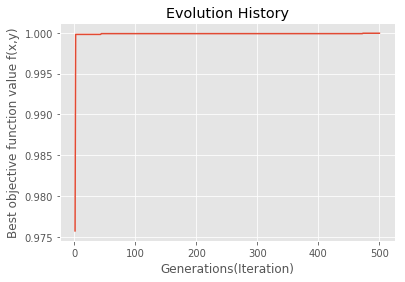

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# set plt style
plt.style.use('ggplot')


rawData = pd.read_csv('PSO_Data.csv')
# print("Shape of the raw data", rawData.shape)
# print(rawData)
# print(rawData.describe())
X, Y = rawData['X'] , rawData['Y']

plt.plot(X,Y)
plt.ylabel("Best objective function value f(x,y)")
plt.xlabel("Generations(Iteration)")
plt.title('Evolution History') 
plt.show()